# Premier League 2024/25 Data Analysis

##### This project explores and analyzes the final standings and top player statistics from the Premier League 2024/25 season. Using Python and popular data science libraries, we investigate team performances, player contributions, and key trends throughout the season. The analysis covers defensive and offensive records, player goal involvements, correlations between various metrics, and highlights standout teams and individuals. Visualizations are provided to support insights and make the findings accessible.

# Aim

##### The aim of this project is to analyze the Premier League 2024/25 season by exploring team performances, player statistics, and key trends. Through data analysis and visualization, the project seeks to uncover insights into defensive and offensive strengths, player contributions, and factors influencing league outcomes.

# Importing Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading Documentation

##### The datasets for this analysis were loaded using the `pandas.read_csv()` function. Two CSV files were used:

- `Premier_League_2024_25_Final_Standings.csv`: Contains the final league standings for all clubs.
- `Premier_League_2024_25_Top_Player_Stats.csv`: Contains top player statistics, including goals, assists, and clean sheets.

##### The data was read into pandas DataFrames named `df_standings` and `df_players` for further analysis and visualization.

# Load Datasets

In [ ]:
df_standings = pd.read_csv(r"C:\Users\DELL\Downloads\la_liga_2024_25_final_standings.csv

In [119]:
df_standings = pd.read_csv(r"C:\Users\DELL\Downloads\Premier_League_2024_25_Final_Standings.csv")
df_players = pd.read_csv(r"C:\Users\DELL\Downloads\Premier_League_2024_25_Top_Player_Stats.csv")

In [120]:
df_standings.describe()

,Position,Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points
count,20.00000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,10.50000,38.0,13.850000,9.750000,14.400000,53.700000,56.150000,-2.45000,51.300000
std,5.91608,0.0,6.158221,2.572629,6.746539,15.519428,13.619935,27.61669,18.731061
min,1.00000,38.0,2.000000,5.000000,4.000000,26.000000,34.000000,-60.00000,12.000000
25%,5.75000,38.0,10.000000,8.000000,9.750000,41.500000,46.750000,-16.25000,40.750000
50%,10.50000,38.0,13.500000,10.000000,14.000000,55.000000,54.500000,0.50000,51.000000
75%,15.25000,38.0,19.250000,11.250000,16.250000,64.250000,59.250000,14.25000,66.000000
max,20.00000,38.0,25.000000,14.000000,30.000000,86.000000,86.000000,45.00000,84.000000


In [121]:
df_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         20 non-null     int64 
 1   Club             20 non-null     object
 2   Played           20 non-null     int64 
 3   Wins             20 non-null     int64 
 4   Draws            20 non-null     int64 
 5   Losses           20 non-null     int64 
 6   Goals For        20 non-null     int64 
 7   Goals Against    20 non-null     int64 
 8   Goal Difference  20 non-null     int64 
 9   Points           20 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.7+ KB


In [169]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  30 non-null     object
 1   Rank      30 non-null     int64 
 2   Player    30 non-null     object
 3   Club      30 non-null     object
 4   Stat      30 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


In [122]:
df_standings.duplicated().sum()

0

In [171]:
df_players.duplicated().sum()

0

In [173]:
df_players.isna().sum()

Category    0
Rank        0
Player      0
Club        0
Stat        0
dtype: int64

In [123]:
df_standings.isna().sum()

Position           0
Club               0
Played             0
Wins               0
Draws              0
Losses             0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
dtype: int64

In [124]:
standings

,Position,Club,Played,Wins,Draws,Losses,Goals For,Goals Against,Goal Difference,Points
0,1,Liverpool,38,25,9,4,86,41,45,84
1,2,Arsenal,38,20,14,4,69,34,35,74
2,3,Manchester City,38,21,8,9,72,44,28,71
3,4,Chelsea,38,20,9,9,64,43,21,69
4,5,Newcastle United,38,20,6,12,68,47,21,66
5,6,Aston Villa,38,19,9,10,63,56,7,66
6,7,Nottingham Forest,38,19,8,11,65,53,12,65
7,8,Brighton,38,16,13,9,60,53,7,61
8,9,Bournemouth,38,15,11,12,58,46,12,56
9,10,Crystal Palace,38,14,10,14,52,50,2,52


In [125]:
players

,Category,Rank,Player,Club,Stat
0,Goals,1,Mohamed Salah,Liverpool,29
1,Goals,2,Alexander Isak,Newcastle United,23
2,Goals,3,Erling Haaland,Manchester City,22
3,Goals,4,Bryan Mbeumo,Brentford,20
4,Goals,4,Chris Wood,Nottingham Forest,20
5,Goals,6,Yoane Wissa,Brentford,19
6,Goals,7,Ollie Watkins,Aston Villa,16
7,Goals,8,Matheus Cunha,Wolverhampton Wanderers,15
8,Goals,8,Cole Palmer,Chelsea,15
9,Goals,10,Jean-Philippe Mateta,Crystal Palace,14


# Data Integration

In [127]:
club_performance = standings.merge(
    players[players['Category'] == 'Goals'].groupby('Club')['Stat'].sum().reset_index(name='Total_Goals'),
    on='Club',
    how='left'
).merge(
    players[players['Category'] == 'Assists'].groupby('Club')['Stat'].sum().reset_index(name='Total_Assists'),
    on='Club',
    how='left'
)

# Questions

## 1. Which teams had the best defensive records (fewest goals conceded)?

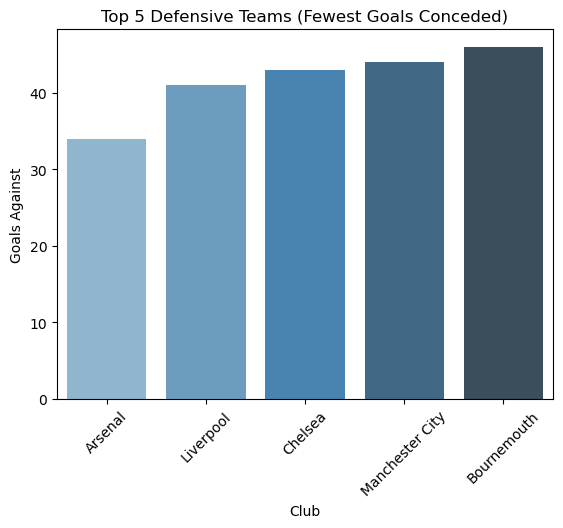

In [130]:

best_defense = df_standings.nsmallest(5, 'Goals Against')[['Club', 'Goals Against']]


sns.barplot(data=best_defense, x='Club', y='Goals Against', hue='Club', palette='Blues_d', legend=False)


plt.title('Top 5 Defensive Teams (Fewest Goals Conceded)')
plt.xticks(rotation=45)
plt.show()

## 2. What's the correlation between goals scored and league position?

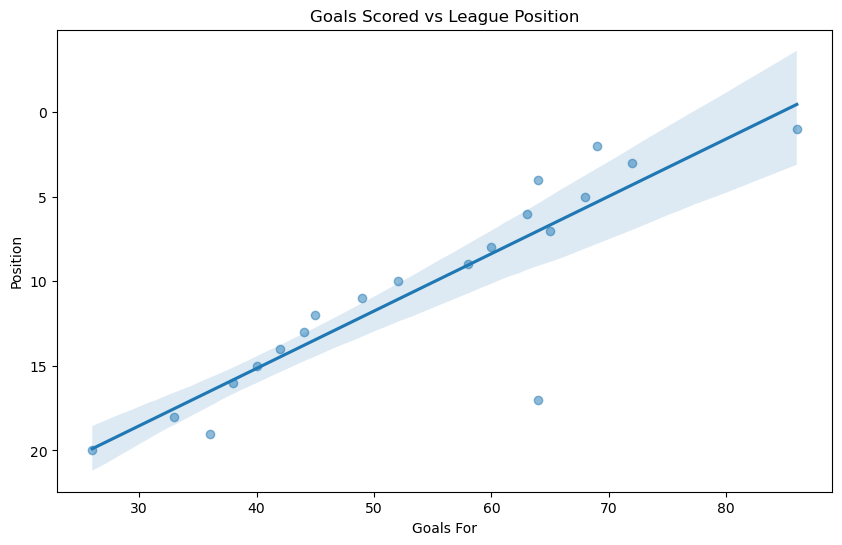

In [132]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_standings, x='Goals For', y='Position', scatter_kws={'alpha':0.5})
plt.gca().invert_yaxis()
plt.title('Goals Scored vs League Position')
plt.show()

## 3. Which players contributed to the most goals (goals + assists)?

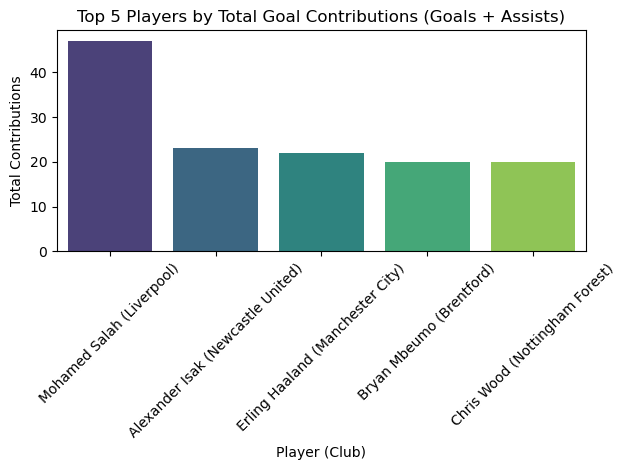

In [134]:
# Extract goals and assists
goals = players[players['Category'] == 'Goals'][['Player', 'Club', 'Stat']]
assists = players[players['Category'] == 'Assists'][['Player', 'Club', 'Stat']]

# Merge and fill missing stats
contributions = pd.merge(goals, assists, on=['Player', 'Club'], how='outer').fillna(0)

# Ensure numeric types
contributions['Stat_x'] = pd.to_numeric(contributions['Stat_x'])
contributions['Stat_y'] = pd.to_numeric(contributions['Stat_y'])

# Compute total contributions
contributions['Total'] = contributions['Stat_x'] + contributions['Stat_y']

# Get top 5 players by total contributions
top_contributors = contributions.nlargest(5, 'Total')[['Player', 'Club', 'Total']]

# Add label column for x-axis
top_contributors['Label'] = top_contributors['Player'] + " (" + top_contributors['Club'] + ")"

# Plot bar chart
sns.barplot(data=top_contributors, x='Label', y='Total', hue='Label', palette='viridis', legend=False)
plt.title('Top 5 Players by Total Goal Contributions (Goals + Assists)')
plt.xlabel('Player (Club)')
plt.ylabel('Total Contributions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. How does goal difference relate to final points?

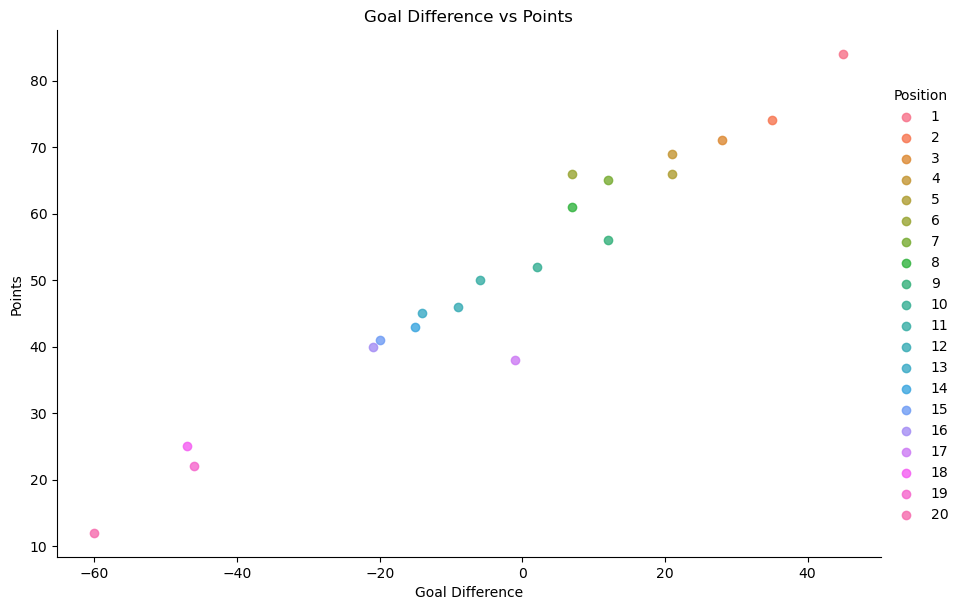

In [136]:
sns.lmplot(data=df_standings, x='Goal Difference', y='Points', 
           hue='Position', height=6, aspect=1.5)
plt.title('Goal Difference vs Points')
plt.show()

## 5. Which clubs outperformed their expected position based on goal difference?

In [138]:
df_standings['GD_Rank'] = df_standings['Goal Difference'].rank(ascending=False)
df_standings['Performance_Gap'] = df_standings['GD_Rank'] - df_standings['Position']
outperformers = df_standings.nsmallest(5, 'Performance_Gap')[['Club','Position','GD_Rank']]
outperformers

,Club,Position,GD_Rank
16,Tottenham Hotspur,17,11.0
8,Bournemouth,9,6.5
18,Ipswich Town,19,18.0
4,Newcastle United,5,4.5
6,Nottingham Forest,7,6.5


## 6. What's the distribution of points among top/middle/bottom teams?

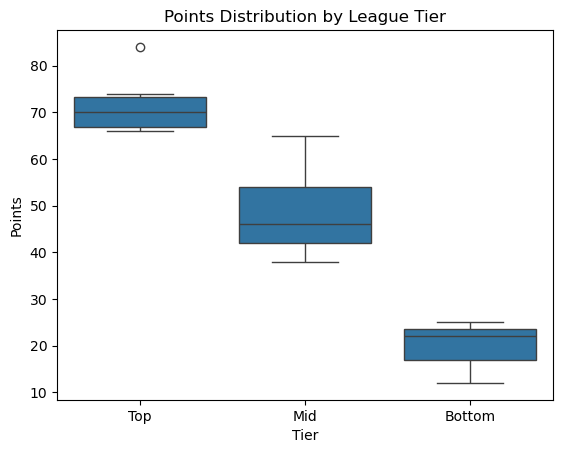

In [140]:
df_standings['Tier'] = pd.cut(df_standings['Position'], 
                             bins=[0,6,17,20],
                             labels=['Top','Mid','Bottom'])
sns.boxplot(data=df_standings, x='Tier', y='Points')
plt.title('Points Distribution by League Tier')
plt.show()

## 7. Which teams had the most balanced attack/defense (smallest |GF-GA|)?

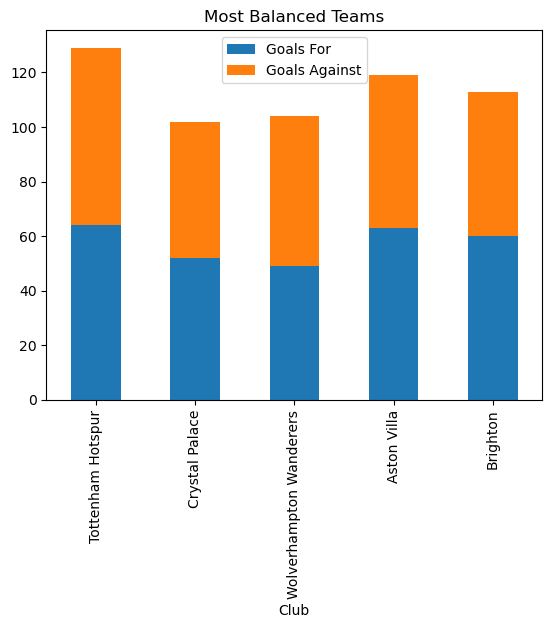

In [142]:
df_standings['Balance'] = abs(df_standings['Goals For'] - df_standings['Goals Against'])
balanced = df_standings.nsmallest(5, 'Balance')[['Club','Goals For','Goals Against']]
balanced.plot(x='Club', kind='bar', stacked=True)
plt.title('Most Balanced Teams')
plt.show()

## 8. How many top scorers does each top-5 team have?

In [144]:
top_teams = df_standings.nsmallest(5, 'Position')['Club'].tolist()
top_scorers = players[players['Category']=='Goals'].nsmallest(10, 'Rank')
top_scorers[top_scorers['Club'].isin(top_teams)]['Club'].value_counts()

Club
Liverpool           1
Newcastle United    1
Manchester City     1
Chelsea             1
Name: count, dtype: int64

## 9. What's the win rate for teams with clean sheet leaders?

In [146]:
cs_leaders = players[players['Category']=='Clean Sheets'].nsmallest(3, 'Rank')['Club']
df_standings[df_standings['Club'].isin(cs_leaders)][['Club','Wins','Played']]

,Club,Wins,Played
1,Arsenal,20,38
6,Nottingham Forest,19,38
15,Everton,9,38


## 10. Which players contributed to both goals and assists significantly?

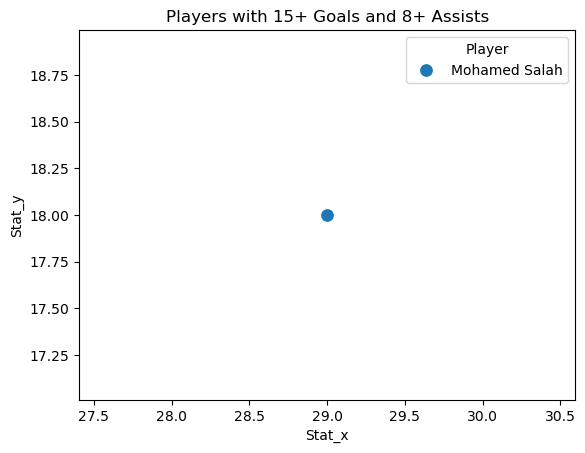

In [148]:
dual_threat = contributions[(contributions['Stat_x']>15) & (contributions['Stat_y']>8)]
sns.scatterplot(data=dual_threat, x='Stat_x', y='Stat_y', hue='Player', s=100)
plt.title('Players with 15+ Goals and 8+ Assists')
plt.show()